# BAR Plot

## Importings

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
# Comprehensive demo of bar plot types using pandas, matplotlib and seaborn
import matplotlib.pyplot as plt

## Synthetic Datasets and Parameters

In [ ]:
# Synthetic Datasets and Parameters
sns.set(style="whitegrid")
np.random.seed(0)

# Example dataset
categories = ['Alpha', 'Beta', 'Gamma', 'Delta']
subcats = ['X', 'Y', 'Z']
n = len(categories) * len(subcats)

df = pd.DataFrame({
    'Category': np.repeat(categories, len(subcats)),
    'Subcategory': subcats * len(categories),
    'Value': np.random.randint(10, 100, size=n),
    'Value2': np.random.randint(1, 40, size=n)  # second numeric column for more plot types
})

# Pivoted data for grouped/stacked plots
df_pivot = df.pivot(index='Category', columns='Subcategory', values='Value')

C:\Users\Black Parrot\AppData\Local\Temp\ipykernel_39312\186153058.py:79: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Subcategory', y='Value', ci='sd', ax=axes[9], palette="muted")
C:\Users\Black Parrot\AppData\Local\Temp\ipykernel_39312\186153058.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Subcategory', y='Value', ci='sd', ax=axes[9], palette="muted")


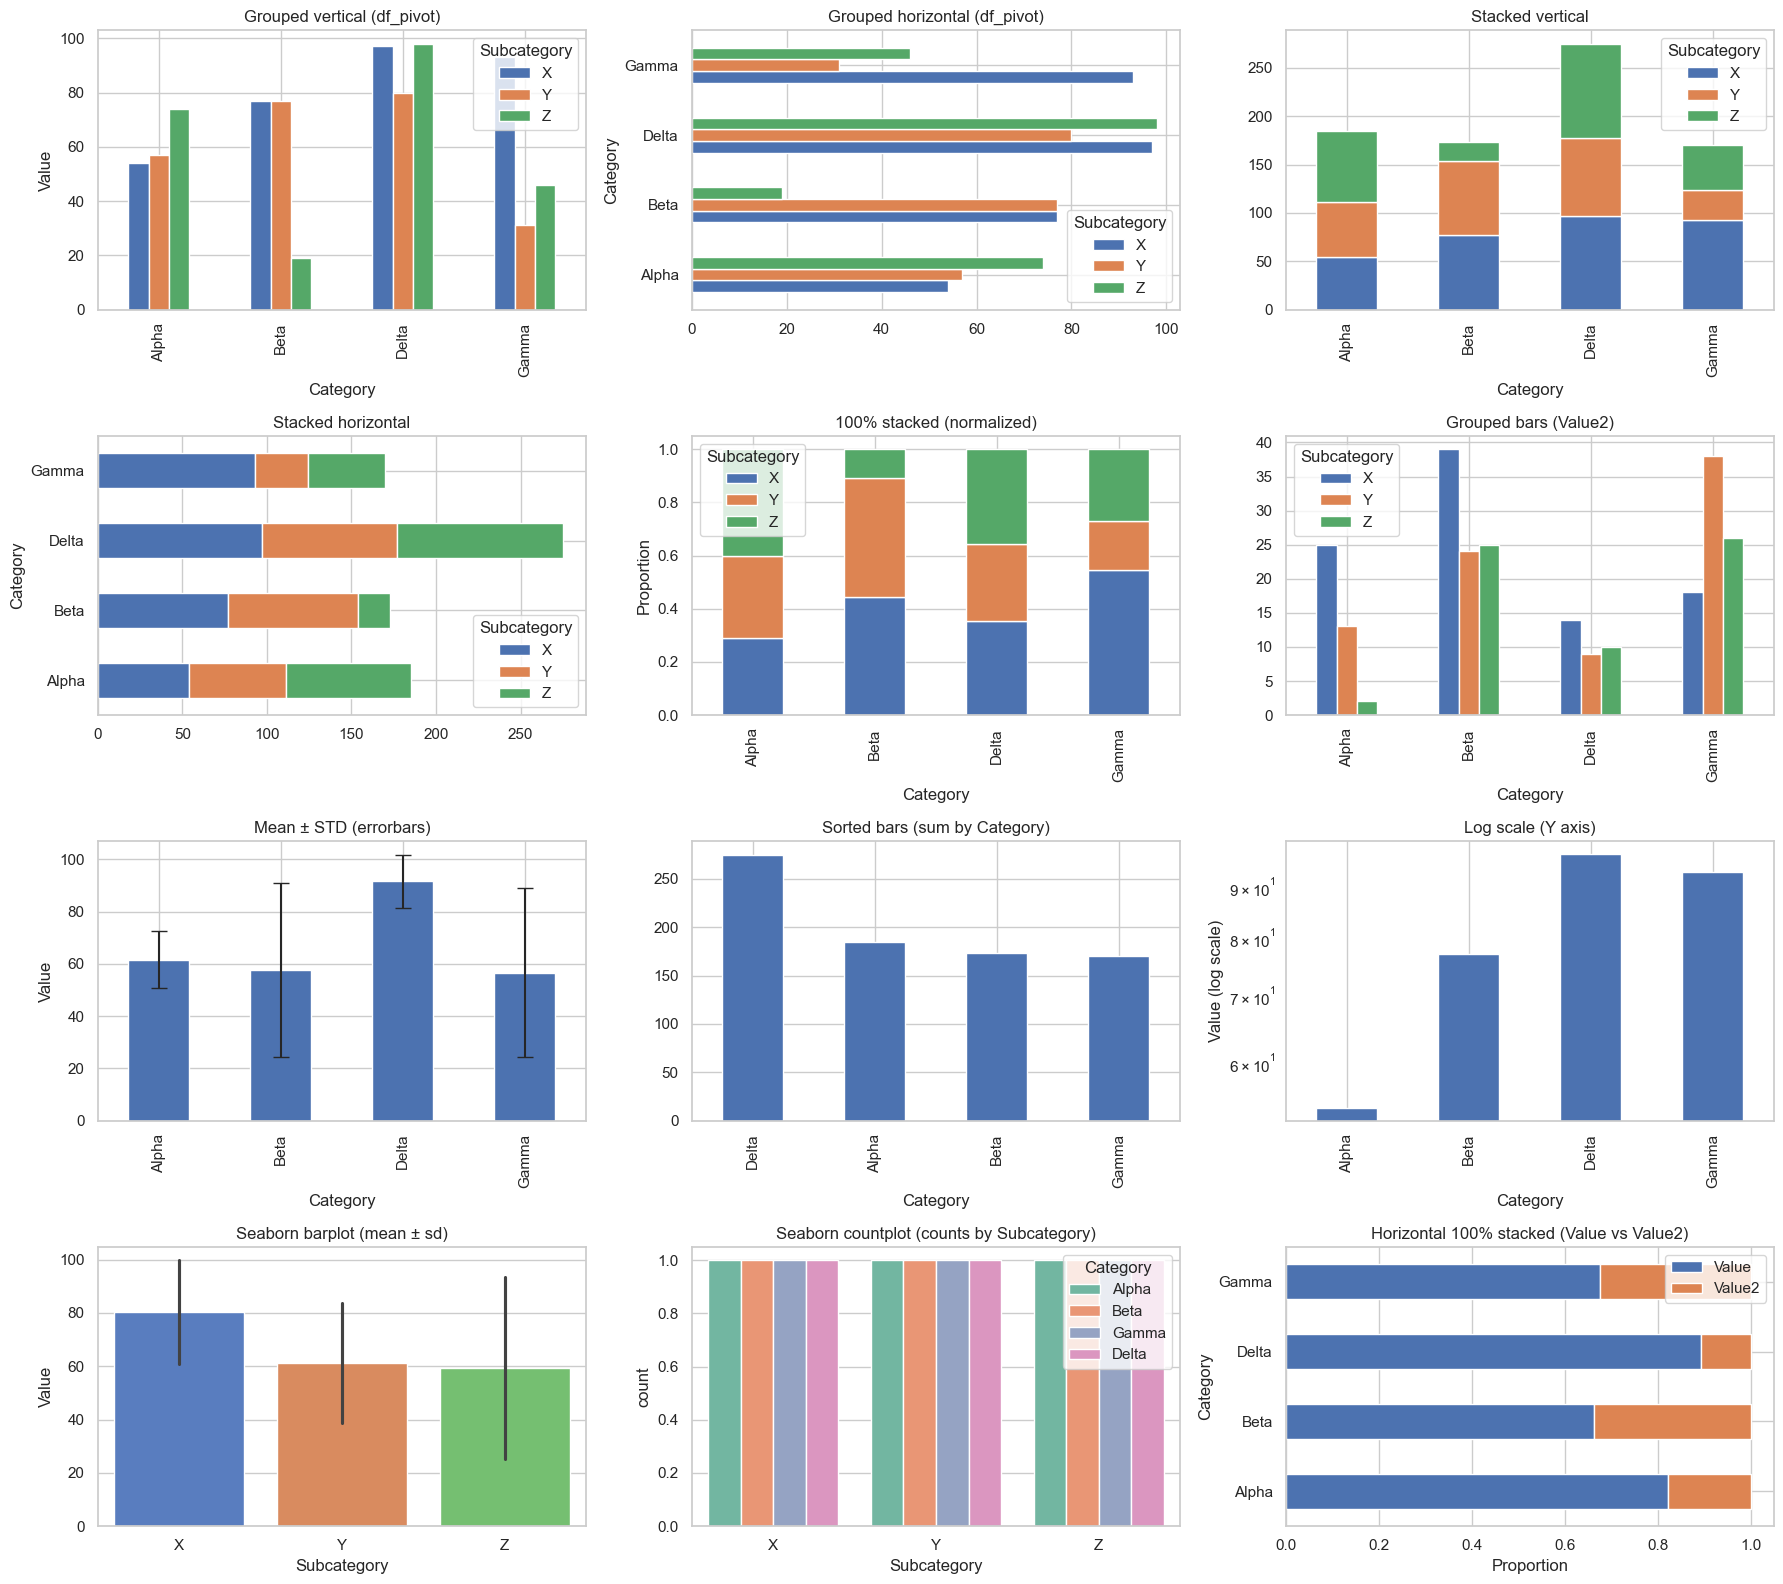

In [ ]:
def demo_bar_plot_types(df, df_pivot):
    """
    Show a variety of bar plot types:
    - group (vertical), group (horizontal)
    - stacked (vertical/horizontal)
    - 100% stacked (normalized)
    - sorted bar
    - error bars
    - log scale
    - seaborn barplot (with CI), countplot
    - grouped multiple columns
    """
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.flatten()
    
    # 1. Simple grouped vertical bar (pandas)
    df_pivot.plot(kind='bar', ax=axes[0], title='Grouped vertical (df_pivot)')
    axes[0].set_ylabel('Value')
    
    # 2. Simple grouped horizontal bar (pandas)
    df_pivot.plot(kind='barh', ax=axes[1], title='Grouped horizontal (df_pivot)')
    
    # 3. Stacked vertical bar
    df_pivot.plot(kind='bar', stacked=True, ax=axes[2], title='Stacked vertical')
    
    # 4. Stacked horizontal bar
    df_pivot.plot(kind='barh', stacked=True, ax=axes[3], title='Stacked horizontal')
    
    # 5. 100% stacked vertical (normalized)
    df_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)
    df_norm.plot(kind='bar', stacked=True, ax=axes[4], title='100% stacked (normalized)')
    axes[4].set_ylabel('Proportion')
    
    # 6. Grouped bars from multiple numeric columns (df.groupby + unstack)
    # create pivot for Value and Value2 to display side-by-side grouped bars
    pivot_multi = df.pivot_table(index='Category', columns='Subcategory', values='Value2', aggfunc='mean')
    pivot_multi.plot(kind='bar', ax=axes[5], title='Grouped bars (Value2)')
    
    # 7. Bar with error bars (mean ± std)
    means = df.groupby('Category')['Value'].mean()
    stds = df.groupby('Category')['Value'].std()
    means.plot(kind='bar', yerr=stds, capsize=6, ax=axes[6], title='Mean ± STD (errorbars)')
    axes[6].set_ylabel('Value')
    
    # 8. Sorted bars
    sorted_vals = df.groupby('Category')['Value'].sum().sort_values(ascending=False)
    sorted_vals.plot(kind='bar', ax=axes[7], title='Sorted bars (sum by Category)')
    
    # 9. Log scale bar
    df_pivot['X'].plot(kind='bar', logy=True, ax=axes[8], title='Log scale (Y axis)')
    axes[8].set_ylabel('Value (log scale)')
    
    # 10. Seaborn barplot (mean + CI)
    sns.barplot(data=df, x='Subcategory', y='Value', ci='sd', ax=axes[9], palette="muted")
    axes[9].set_title('Seaborn barplot (mean ± sd)')
    
    # 11. Seaborn countplot (counts per subcategory)
    sns.countplot(data=df, x='Subcategory', hue='Category', ax=axes[10], palette="Set2")
    axes[10].set_title('Seaborn countplot (counts by Subcategory)')
    
    # 12. Horizontal stacked 100% by stacking Value and Value2 for each Category
    stacked_df = df.groupby('Category')[['Value', 'Value2']].sum()
    stacked_prop = stacked_df.div(stacked_df.sum(axis=1), axis=0)
    stacked_prop.plot(kind='barh', stacked=True, ax=axes[11], title='Horizontal 100% stacked (Value vs Value2)')
    axes[11].set_xlabel('Proportion')
    
    plt.tight_layout()
    plt.show()

# Run the demo
demo_bar_plot_types(df, df_pivot)